<a href="https://colab.research.google.com/github/TuanKiet04/Final_Project/blob/main/Analyze1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%pip install facebook_scraper

In [6]:
# Import thư viện
from facebook_scraper import get_posts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
path="/content/drive/MyDrive/Final Python/Divodivafanvietnam.npy"
post_list = np.load(path,allow_pickle=True)
post_df_full = pd.read_excel("/content/drive/MyDrive/Final Python/Divodivafanvietnam.xlsx")

In ra các trường từ khóa để thuận tiện cho việc lọc dữ liệu không cần thiết

In [8]:
print(type(post_list[0]))
x = post_list[0].keys()
x

<class 'dict'>


dict_keys(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time', 'timestamp', 'image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments', 'shares', 'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live', 'fetched_time'])

Sau khi đã có các trường từ khóa thì loại bỏ các cột dữ liệu không cần thiết để thuận tiện cho việc phân tích dữ liệu và dễ kiểm soát hơn

In [ ]:
to_drop = ['image', 'image_lowquality', 'images', 'images_description', 'images_lowquality',
           'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height',
           'video_id', 'video_quality', 'video_width', 'w3_fb_url', 'image_id', 'image_ids', 'was_live',
           'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck',
           'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url',
           'available' , 'video_size_MB', 'video_thumbnail', 'fetched_time', 'sharers', 'header',
           'video_watches', 'shared_text', 'original_text', 'with', 'likes']

post_df_full.drop(to_drop, axis=1, inplace=True)
post_df_full

Tạo 1 Data Frame chứa post_id và reactions

In [11]:
post_df_full1=post_df_full
post_df_full1[['post_id', 'reactions']]

,post_id,reactions
0,731184905717847,"{'thích': 1803, 'yêu thích': 608, 'haha': 17, ..."
1,731115405724797,"{'thích': 3198, 'yêu thích': 564, 'haha': 39, ..."
2,730996589070012,"{'thích': 1677, 'yêu thích': 19, 'haha': 1349,..."
3,730641742438830,"{'thích': 4018, 'yêu thích': 705, 'haha': 17, ..."
4,730449829124688,"{'thích': 4323, 'yêu thích': 366, 'haha': 37, ..."
...,...,...
95,708267548009583,"{'thích': 1699, 'yêu thích': 39, 'haha': 407, ..."
96,708162288020109,"{'thích': 1969, 'yêu thích': 26, 'haha': 1884,..."
97,707840848052253,"{'thích': 1614, 'yêu thích': 374, 'haha': 4, '..."
98,707355751434096,"{'thích': 4538, 'yêu thích': 650, 'haha': 9, '..."


In [12]:
#Chuyển mỗi thành phần trong reactions thành 1 từ điển
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )

#Tạo các thành phần đó thành các cột
data_reactions = post_df_full1['reactions'].apply(pd.Series )

# Các giá trị trả về NaN ta thay bằng 0
data_reactions = data_reactions.fillna(0)

Gộp các cột trong data_reactions lại vào 1 dataframe mới

In [13]:
datafr_reactions = pd.concat([post_df_full1, data_reactions], axis=1).drop('reactions', axis=1)

datafr_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"Nổi tiếng với năng lượng ""bão tố"" mỗi khi xuất...",1803.0,608.0,17.0,3.0,0.0,1.0,13.0,41,87,2445
1,"Sau khi công chiếu tập 2, ""Chị Đẹp Đạp Gió Rẽ ...",3198.0,564.0,39.0,0.0,3.0,0.0,6.0,8,170,3810
2,"Phải công nhận là Diệu Nhi hát buồn cười thật,...",1677.0,19.0,1349.0,0.0,0.0,0.0,7.0,2,55,3052
3,Là 2 Gameshow âm nhạc có độ Hot lớn nhất hiện ...,4018.0,705.0,17.0,3.0,3.0,0.0,9.0,21,72,4755
4,"Khỏi vòng vo nè, giọng Phương Mỹ Chi mà bảo rằ...",4323.0,366.0,37.0,6.0,5.0,0.0,14.0,43,271,4751
...,...,...,...,...,...,...,...,...,...,...,...
95,"Đức Trí - Phương Thanh, chúng mình có nhau!\n\...",1699.0,39.0,407.0,0.0,3.0,1.0,9.0,4,26,2158
96,GAME VUI NGÀY MỚI!\n\nP/s: Ai đoán được thì hẳ...,1969.0,26.0,1884.0,6.0,43.0,1.0,2.0,6,191,3931
97,Là bài hát duy nhất được phối theo kiểu Pop Or...,1614.0,374.0,4.0,0.0,2.0,0.0,6.0,3,26,2000
98,"Bằng giai điệu Pop pha với R&B, Rap và Eclectr...",4538.0,650.0,9.0,1.0,3.0,0.0,8.0,14,105,5209


1. Page có lượt thả cảm xúc như thế nào?

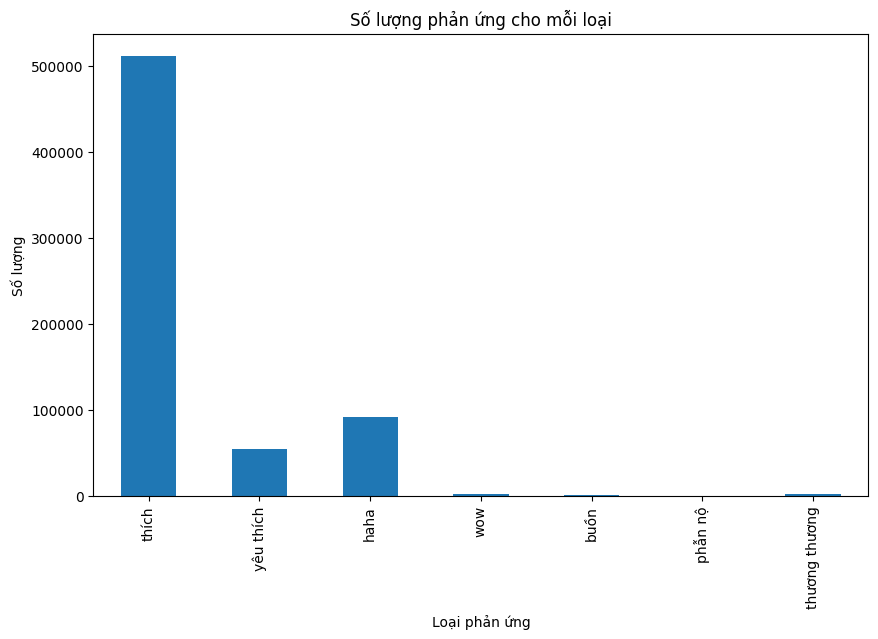

In [14]:
from datetime import datetime
import matplotlib.pyplot as plt

# Chọn dữ liệu cần vẽ
reaction_columns = ['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']

# Vẽ biểu đồ
datafr_reactions[reaction_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Số lượng phản ứng cho mỗi loại')
plt.xlabel('Loại phản ứng')
plt.ylabel('Số lượng')
plt.show()

2. Mỗi bài đăng có số lượng reacts ra sao


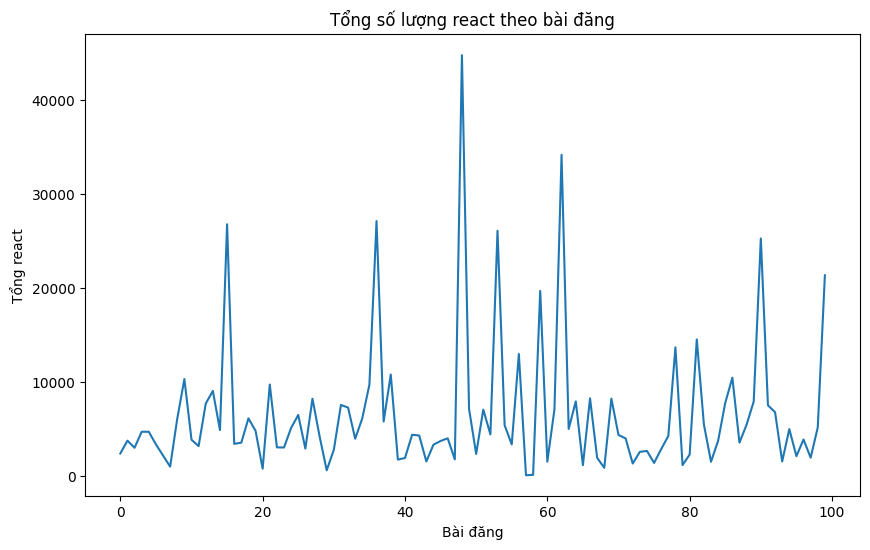

6627.71

In [41]:
# Vẽ biểu đồ đường
datafr_reactions['reaction_count'].plot(kind='line', figsize=(10, 6))
plt.title('Tổng số lượng react theo bài đăng')
plt.xlabel('Bài đăng')
plt.ylabel('Tổng react')
plt.show()
datafr_reactions['reaction_count'].mean()

3. Bài viết nào có lượt tương tác cao nhất và thấp nhất?

In [16]:
max_reactions = post_df_full[post_df_full['reaction_count']== post_df_full['reaction_count'].max()]
max_reactions[['post_text', 'time', 'reaction_count']]

,post_text,time,reaction_count
48,"Không chỉ là Quán quân Vietnam Idol 2023, Hà A...",2023-10-23 07:16:04,44777


In [27]:
min_reactions = post_df_full[post_df_full['reaction_count']== post_df_full['reaction_count'].min()]
min_reactions[['post_text', 'time', 'reaction_count']]

,post_text,time,reaction_count
57,1664 BLANC MỞ BẤT NGỜ CÙNG MASCOT THẦN TƯỢNG T...,2023-10-20 15:00:39,134


Tạo thêm cột thời gian cho dataframe bên trên

In [22]:
import pandas as pd

post_df_full2=post_df_full[['time','reaction_count']]
post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])
post_df_full2['day'] = post_df_full2['time'].dt.day
post_df_full2['month'] = post_df_full2['time'].dt.month
post_df_full2

<ipython-input-22-e12f767e19fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full2['time'] = pd.to_datetime(post_df_full2['time'])
<ipython-input-22-e12f767e19fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_full2['day'] = post_df_full2['time'].dt.day
<ipython-input-22-e12f767e19fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,time,reaction_count,day,month
0,2023-11-09 14:19:06,2445,9,11
1,2023-11-09 12:02:30,3810,9,11
2,2023-11-09 06:39:46,3052,9,11
3,2023-11-08 14:28:42,4755,8,11
4,2023-11-08 06:03:21,4751,8,11
...,...,...,...,...
95,2023-10-02 08:45:07,2158,2,10
96,2023-10-02 03:43:56,3931,2,10
97,2023-10-01 13:17:45,2000,1,10
98,2023-09-30 14:19:28,5209,30,9


4. Phân tích sự thay đổi trong khoảng 20 ngày được chỉ định

In [28]:
data_20_days = post_df_full2[(post_df_full2['day'] >=11 ) & (post_df_full2['day'] < 31) & (post_df_full2['month'] == 10)]
date = data_20_days['time'].to_list()
reaction_list = data_20_days['reaction_count'].to_list()
date.reverse()
reaction_list.reverse()

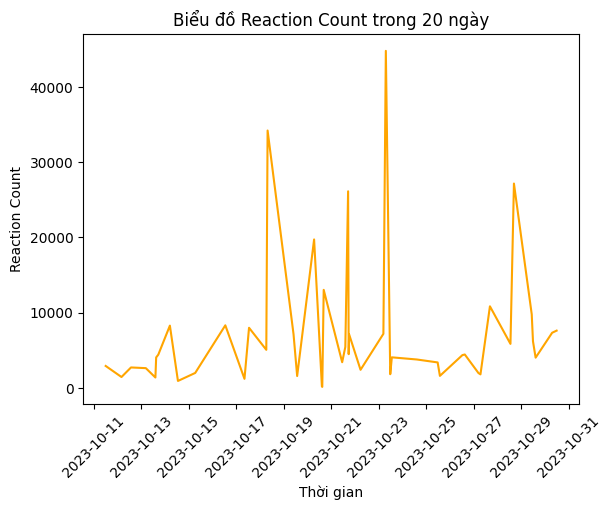

In [29]:
plt.plot(date, reaction_list, color= 'orange')
plt.xticks(rotation=45)

plt.title('Biểu đồ Reaction Count trong 20 ngày')
plt.xlabel('Thời gian')
plt.ylabel('Reaction Count')

plt.show()

5. Trung bình số lượng react trong 20 ngày đó ra sao

In [31]:
data_20_days['reaction_count'].mean()

7304.673913043478

Sắp xếp giảm dần các post theo số lượng reaction

In [39]:
sort = post_df_full[['text', 'reaction_count']].sort_values(by= 'reaction_count', ascending= False)
sort

,text,reaction_count
48,"Không chỉ là Quán quân Vietnam Idol 2023, Hà A...",44777
62,"Để mà liệt kê những ""thằng đàn ông tồi"" từng l...",34193
36,"Ninh Dương Lan Ngọc khẳng định là chỉ có ""Chị ...",27149
15,"Top 10 phát ngôn SLAY nhất ""Chị Đẹp Đạp Gió Rẽ...",26812
53,"Một sự ""thâm nho"" không hề nhẹ đến từ Vietnam ...",26119
...,...,...
68,"Hooligan: Tên thật là Lê Công Thành , sinh ngà...",920
20,Làm Clip chân thật để thiên hạ không nói Page ...,831
29,"Những tưởng ""Tiếng Hát Hà Nội 2023"" sẽ khép lạ...",659
58,"Một giọng hát vô cùng nồng nàn, nữ tính, ad rấ...",173
